# plot feature importance

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

input_dir = "/home/ubuntu/frameshift-1/carlota/augur_allcellines"
print(f"📂 Scanning directory: {input_dir}")

# Find all feature importance files
files = [f for f in os.listdir(input_dir) if f.startswith("feature_importances_") and f.endswith(".csv")]
print(f"📝 Found {len(files)} feature_importances files.")

all_data = []

for file in files:
    print(f"🔵 Loading file: {file}")
    df = pd.read_csv(os.path.join(input_dir, file))
    all_data.append(df)

# Combine all
combined_df = pd.concat(all_data, ignore_index=True)
print(f"✅ Combined dataframe shape: {combined_df.shape}")

# Rename to match your columns
combined_df = combined_df[['drug', 'genes', 'feature_importances']]
print(f"✅ Using columns: {combined_df.columns.tolist()}")

# (Optional) Keep only top N genes per drug for readability
top_n = 10
print(f"🔎 Selecting top {top_n} genes per drug...")
top_genes = (
    combined_df.groupby("drug")
    .apply(lambda x: x.nlargest(top_n, "feature_importances"))
    .reset_index(drop=True)
)

print(f"✅ Final plotting dataframe shape: {top_genes.shape}")

📂 Scanning directory: /home/ubuntu/frameshift-1/carlota/augur_allcellines
📝 Found 6 feature_importances files.
🔵 Loading file: feature_importances_plate3_RMC-6236.csv
🔵 Loading file: feature_importances_plate3_Celecoxib.csv
🔵 Loading file: feature_importances_plate9_Dinaciclib.csv
🔵 Loading file: feature_importances_plate9_Adagrasib.csv
🔵 Loading file: feature_importances_plate14_Homoharringtonine.csv
🔵 Loading file: feature_importances_plate6_Homoharringtonine.csv
✅ Combined dataframe shape: (51593703, 6)
✅ Using columns: ['drug', 'genes', 'feature_importances']
🔎 Selecting top 10 genes per drug...
✅ Final plotting dataframe shape: (50, 3)


/tmp/ipykernel_219667/338003941.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(top_n, "feature_importances"))


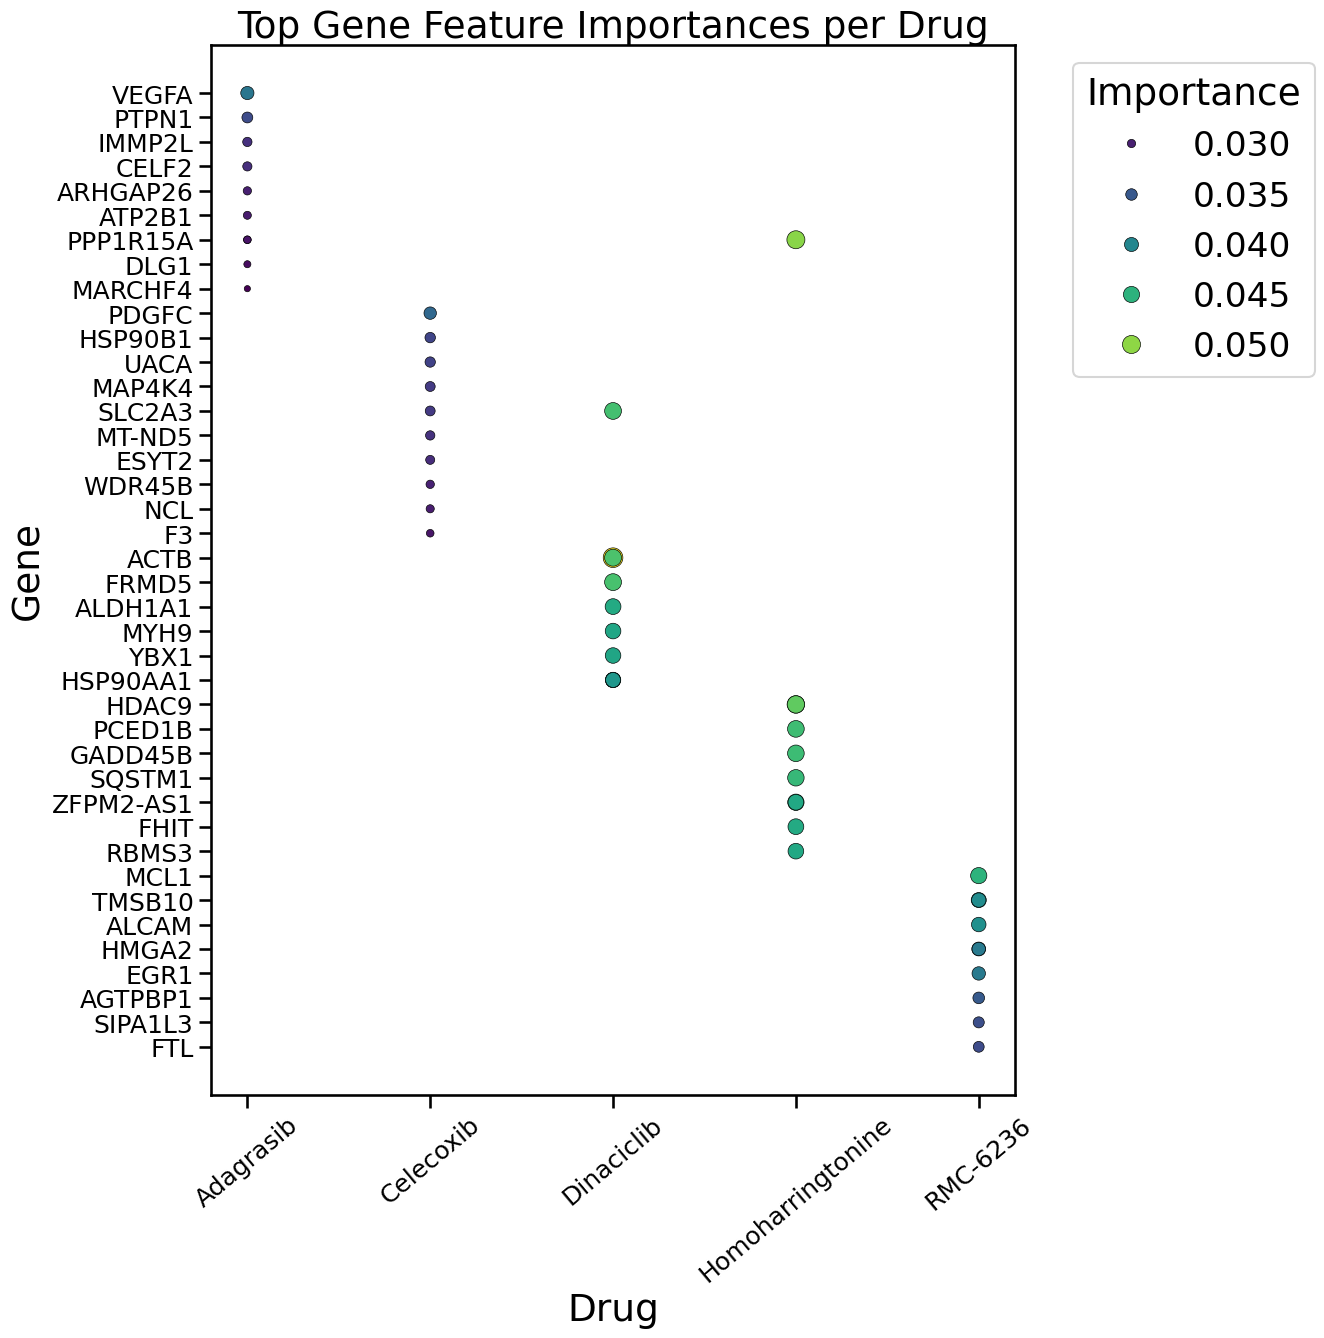

In [35]:
# Plot
plt.figure(figsize=(14, 14))  # increased height
sns.scatterplot(
    data=top_genes,
    x="drug",
    y="genes",
    size="feature_importances",
    hue="feature_importances",
    sizes=(20, 200),
    palette="viridis",
    edgecolor="black"
)
plt.xticks(rotation=40)
plt.yticks(fontsize=18)  # 👈 smaller gene labels
plt.xticks(fontsize=18)
plt.title("Top Gene Feature Importances per Drug")
plt.ylabel("Gene")
plt.xlabel("Drug")
plt.legend(title="Importance", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
